# Analisis Cluster Menggunakan K-Means

In [44]:
# Melakukan import beberapa library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [45]:
# Memanggil dataset dan mengubahnya ke suatu dataframe
data = pd.read_csv("C:/Users/melin/Documents/SEMESTER 3/ANALISIS DATA EKSPLORATIF/UserCarData.csv")
data = data[data['sold'] == 'Y']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           2000 non-null   int64  
 1   name               2000 non-null   object 
 2   year               2000 non-null   int64  
 3   selling_price      2000 non-null   int64  
 4   km_driven          2000 non-null   int64  
 5   Region             2000 non-null   object 
 6   State or Province  2000 non-null   object 
 7   City               2000 non-null   object 
 8   fuel               2000 non-null   object 
 9   seller_type        2000 non-null   object 
 10  transmission       2000 non-null   object 
 11  owner              2000 non-null   object 
 12  mileage            2000 non-null   float64
 13  engine             2000 non-null   int64  
 14  max_power          2000 non-null   float64
 15  torque             2000 non-null   object 
 16  seats              2000 

In [46]:
# Memilih variabel-variabel yang akan dikelompokkan
data = data[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']]

In [47]:
# Memeriksa 5 baris awal, banyaknya kolom dan baris, serta jenis data dari variabel-variabel yang akan dikelompokkan
data.head()

,selling_price,km_driven,mileage,engine,max_power
0,450000,145500,23.40,1248,74.00
1,370000,120000,21.14,1498,103.52
2,158000,140000,17.70,1497,78.00
3,225000,127000,23.00,1396,90.00
4,130000,120000,16.10,1298,88.20


In [48]:
data.shape

(2000, 5)

In [49]:
data.dtypes

selling_price      int64
km_driven          int64
mileage          float64
engine             int64
max_power        float64
dtype: object

In [50]:
# Mengubah tipe data float menjadi integer
data['mileage'] = data['mileage'].astype(int)
data['max_power'] = data['max_power'].astype(int)
data.dtypes

selling_price    int64
km_driven        int64
mileage          int32
engine           int64
max_power        int32
dtype: object

In [51]:
# Memeriksa apakah variabel-variabel yang akan dikelompokkan ada missing value atau tidak
data.isnull().sum()

selling_price    0
km_driven        0
mileage          0
engine           0
max_power        0
dtype: int64

In [52]:
# Melakukan transformasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [53]:
# Membangun model KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
kmeans.fit(data_scaled)

C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [11]:
# Memvisualisasikan hasil dari model KMeans
label = kmeans.fit_predict(data_scaled)
data_test = data.copy()
data_test['label'] = label
data_test['label'] = data_test['label'].astype(str)

C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Nilai Odometer VS Harga Jual')

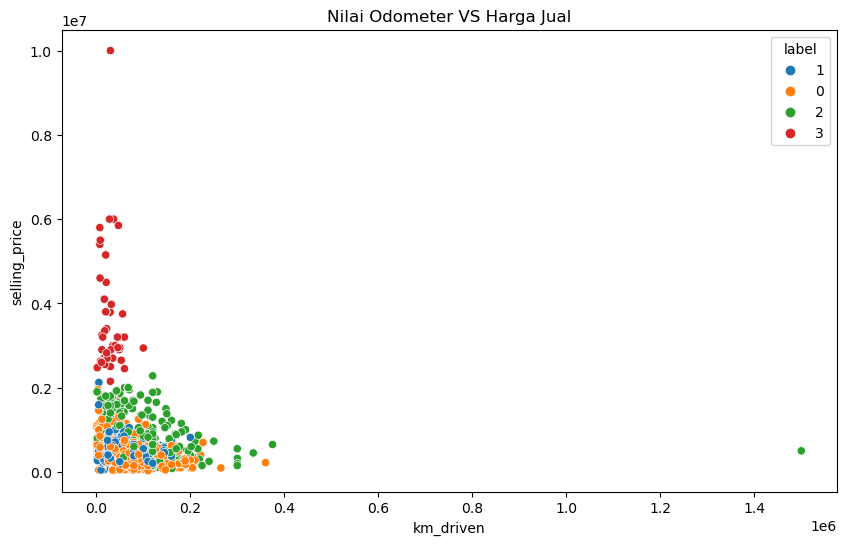

In [12]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = data_test['km_driven'],
               y = data_test['selling_price'],
               hue = data_test['label'])
plt.title('Nilai Odometer VS Harga Jual')

Text(0.5, 1.0, 'Mesin VS Harga Jual')

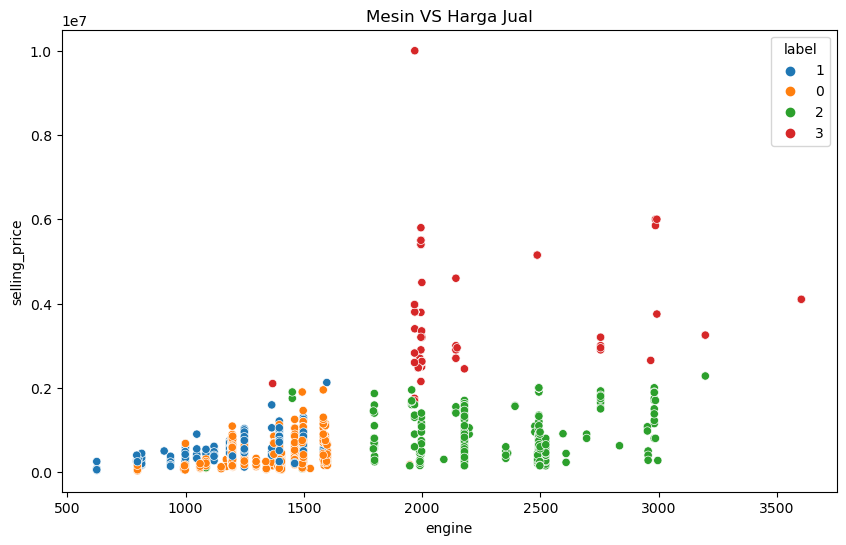

In [13]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = data_test['engine'],
               y = data_test['selling_price'],
               hue = data_test['label'])
plt.title('Mesin VS Harga Jual')

Text(0.5, 1.0, 'Tenaga VS Harga Jual')

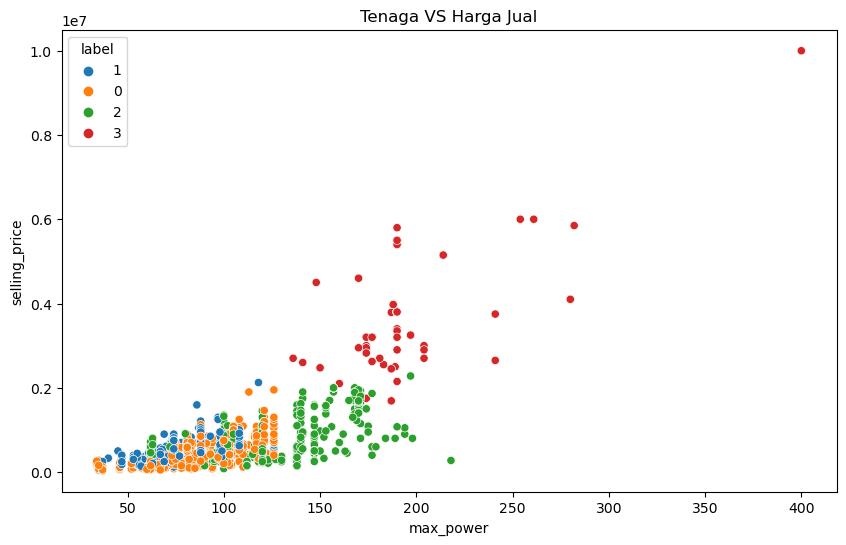

In [14]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = data_test['max_power'],
               y = data_test['selling_price'],
               hue = data_test['label'])
plt.title('Tenaga VS Harga Jual')

# Membuat Jumlah Cluster Optimal

In [54]:
# Membuat kolom baru yang dinamakan label sebagai tempat hasil dari pengelompokkan dan memeriksa keluaran dari model KMeans pada langkah 7
label = kmeans.fit_predict(data_scaled)
data_output = data.copy()
data_output['cluster'] = label
data_output['cluster'].value_counts()

C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    912
1    628
2    351
3    109
Name: cluster, dtype: int64

C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\melin\anaconda4\lib\site-packages\sklearn\clust

Text(0, 0.5, 'Inertia')

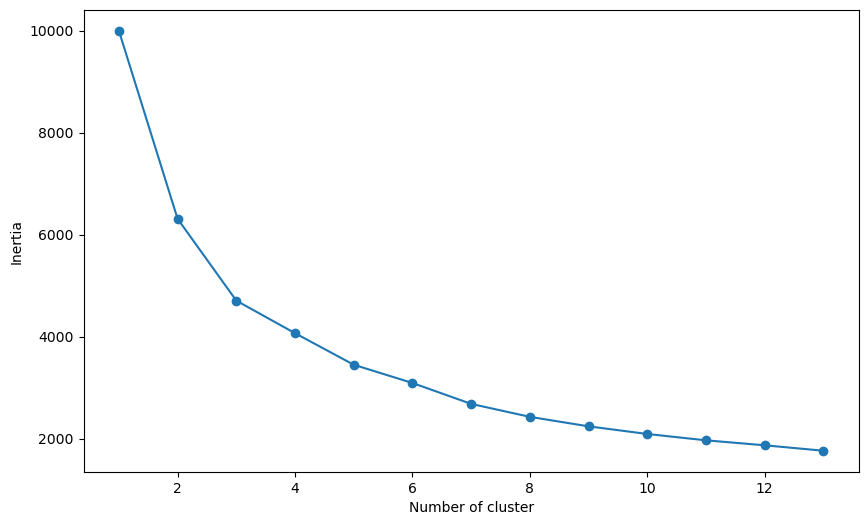

In [55]:
# Menemukan jumlah cluster K yang optimal menggunakan metode elbow
distance_values = []
for cluster in range(1, 14):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    distance_values.append(kmeans.inertia_)
    
cluster_output = pd.DataFrame({'Cluster':range(1,14),
                              'distance_values':distance_values})

plt.figure(figsize=(10,6))
plt.plot(cluster_output['Cluster'],
        cluster_output['distance_values'], marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')

# Membuat Profil Cluster KMeans

In [39]:
# Membuat kolom baru yang dinamakan label sebagai tempat hasil dari pengelompokkan data dan memeriksa keluaran dari model Kmeans pada langkah 7
label = kmeans.fit_predict(data_scaled)
data_output = data.copy()
data_output['cluster'] = label
data_output['cluster'].value_counts()

C:\Users\melin\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    912
1    628
2    351
3    109
Name: cluster, dtype: int64

In [40]:
# Membuat kolom baru
cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']

In [41]:
# Menentukan rata-rata keseluruhan per variabel
overall_mean = data_output[cols].apply(np.mean).T
overall_mean = pd.DataFrame(overall_mean, columns=['overall_average'])
overall_mean

,overall_average
selling_price,676371.5380
km_driven,68707.4400
mileage,18.7820
engine,1470.1895
max_power,91.9080


In [42]:
# Menentukan rata-rata per cluster per variabel untuk melakukan profil cluster yang terbentuk
cluster_mean = data_output.groupby('cluster')[cols].mean().T
cluster_mean

cluster,0,1,2,3
selling_price,393650.348684,494741.995223,749831.868946,3.851789e+06
km_driven,70264.377193,53226.105096,106620.168091,2.278986e+04
mileage,17.994518,23.202229,13.572650,1.667890e+01
engine,1255.660088,1173.178344,2332.991453,2.197991e+03
max_power,81.212719,74.692675,119.541311,1.915963e+02


In [43]:
pd.concat([cluster_mean,overall_mean],axis=1)

,0,1,2,3,overall_average
selling_price,393650.348684,494741.995223,749831.868946,3.851789e+06,676371.5380
km_driven,70264.377193,53226.105096,106620.168091,2.278986e+04,68707.4400
mileage,17.994518,23.202229,13.572650,1.667890e+01,18.7820
engine,1255.660088,1173.178344,2332.991453,2.197991e+03,1470.1895
max_power,81.212719,74.692675,119.541311,1.915963e+02,91.9080
